## Vision-Python Demonstration Workbook: Vision Language

*Objective*: To illustrate access to a vision service that delivers standard python-ready json structures with the longer-term goal of demonstrating access to client FAST environments.


### Audience

This notebook contains some basic Vision coding examples that illustrate access and manipulation of data in Vision from your python environment.  Vision expressions can return text or python dictionary structures.  The audience for these examples is expected to have basic familiarity with the Vision language and with python

#### Notes

* This notebook provides a number of examples that fetch data from a Vision federated database utilizing an open-source node-js package talking to vision.  This is a work-in-progress designed to demonstrate concepts.  Only FactSet internals will have access to this database.  All of the components demonstrated here are designed to work with client Vision environments as well.

* You will need to set an environment variable to tell python where the Vision Server is listening.  Use the python _os.environm_ function to set the server name.


### Getting Started

To begin, you will need to import the Vision Connection (vconnect) module.  __[Get the <i>vconnect</i> module here](https://github.com/LeslieNewman/Vi-Py/blob/main/py/vconnect.py)__ .  Store this file locally in your normal work area.  The examples will be using several functions from this module:

* *vc.runvget* is used to submit a Vision expression as a *get* url.
* *vc.runvision* is used to run a Vision query and return the results as text
* *vc.runvisionJSON* is used to run a Vision query and return the results as a JSON dictionary.  

The examples below also use the *DataFrame* class from the *pandas* module, so you probably want to import that as well.

You will need to use the _os.environ_ function to identify the location of your Vision Server.


In [1]:
import pandas as pd
import vconnect as vc

import os
#--  Set the name of your Vision Server
os.environ['VisionServerAddress'] = 'http://visdeva06.factset.com:10010/vision/api'

### Waking up the Vision Service

This demo is leveraging a non-production service running on a dev box.  At any time, the service may be in one of the following states:

1. Available
1. Needing Restart
1. Dead

The following code can be run to determine which state the service is in:

>`
  vc.runvision ('2 + 2')
>`

If the service is **available**, you will see an appropriate response.  If the service is **needing restart**, you will get an error message that includes the text *RemoteDisconnected* after a minute or so.  If you see this message, you should run the code again which should restart the service for you.  This step may take a minute or two to finish.  If you get another error message, the service is most like **dead** and will need manual intervention on the unix account.


In [2]:
#-- wake up the Vision service
print (vc.runvision('2 + 2'))

     4.00



## Running Basic Vision Expressions

The function *vc.runvision* is used to execute a Vision expression supplied as a string parameter, returning text.


In [3]:
#-- As basic as you can get
vc.runvision('2+2')

'     4.00\n'

In [4]:
#-- show all the currencies
vc.runvision('Currency masterListCodes')

'Code   Name\nUSD    US Dollar\nCAD    Canadian Dollar\nEUR    Euro Dollar\nLEGACY LEGACY\nATS    Austrian Schilling\nBEF    Belgian Franc\nFIM    Finnish Markka\nFRF    French Franc\nDEM    German Deutschmark\nIEP    Irish Punt\nITL    Italian Lira\nNLG    Netherlands Guilder\nPTE    Portugese Escudo\nESP    Spanish Peseta\nLUF    Luxembourg Franc\nGRD    GRD\n\n'

In [5]:
#--  make that look prettier
print(vc.runvision('Currency masterListCodes'))

Code   Name
USD    US Dollar
CAD    Canadian Dollar
EUR    Euro Dollar
LEGACY LEGACY
ATS    Austrian Schilling
BEF    Belgian Franc
FIM    Finnish Markka
FRF    French Franc
DEM    German Deutschmark
IEP    Irish Punt
ITL    Italian Lira
NLG    Netherlands Guilder
PTE    Portugese Escudo
ESP    Spanish Peseta
LUF    Luxembourg Franc
GRD    GRD




In [6]:
#--  Federation is available
result = vc.runvision('SecurityMap findId: "FDS" . profile ')
print (result)

SecurityMap entry 303075105
Aliases: CUSIP_303075105 | MSCITSCODE_TS66137 | PERMID_DJC0PL-S-US | SEDOL_2329770 | TICKERUS_FDS | 

 * FactSet   303075105    FDS          FACTSET RESEARCH SYSTEMS INC
   FundPricesDefault      Default      Default
   CSIStandar30307510     FDS          FACTSET RESEARCH SYSTEMS INC
   CSIResearcDefault      Default      Default
   Msci      TS66137      TS66137      FACTSET RESEARCH SYSTEMS
   Worldscope303075105   C    FDS        303075105  2329770   US3030751057  FACTSET RESEARCH SYSTEMS INC.
   IbesDomMM FD1          FD1          FACTSET RESEARCH SYSTEMS INC
   IbesIntMM Default      Default      Default
   SandP     30307510     FDS          FactSet Research System Inc
   Russell   30307510     FDS          FACTSET RESEARCH SYSTEMS
   Topix     Default      Default      Default
   Ftse      C69897.F     C69897.F     Factset Research Systems
   DJStoxx   SC000FDS     SC000FDS     FACTSET RESEARCH SYS.
   LocalVisioDefault      Default      Default




In [7]:
#--  Since we are just returninig text, any Selector Not Founds will flow right through
result = vc.runvision('Currency makeBelieveMessage')
print (result)


>>> Selector 'makeBelieveMessage' Not Found <<<
      NA 



## Running Vision Expressions that Return JSON

The function *vc.runvisionJSON* is used to execute a Vision expression that is designed to return a dictionary object.  There are several ways to use Vision to create an object that can be transported to python via a JSON represenstation.  The following methods have been defined at the new Vision class _JS_ to return a python *array* of *dict* objects:

* *getArrayFrom: block for: itemString*
* *getArrayFrom: block for: itemString over: dateList*

where:
* *block* is a Vision block containing the code to run.  This code shoud return a Vision Collection object
* *itemString* is a string containing a comma-separated set of vision expressions to run for each element of the collection
* *dateList* is a list of dates or a Vision DateRange.  If omitted, ^date is used

These methods return a dictionary structure which includes:

* *rowCount*  :  number of rows returned in the array
* *colCount*  :  number of columns returned in the array
* *items*  :  array of item expressions requested  (the keys)
* *dates*  :  array of dates requests
* *array*  : array of dict objects containing the values for each key
              
   

In [8]:
#--  First example using getArray
#--  List all the currencies and their latest exchange rate

vcode = '''
JS getArrayFrom: [ CurrencyMap factset masterList first: 5 ]
   for: "name,usExchange"
'''
vc.runvisionJSON(vcode)

{'processId': 28967,
 'rowCount': 5,
 'colCount': 4,
 'items': ['id', 'date', 'name', 'usExchange'],
 'dates': [20201224],
 'array': [{'id': 'USD',
   'date': 20201224,
   'usExchange': 1,
   'name': 'U.S. Dollar'},
  {'id': 'CAD',
   'date': 20201224,
   'usExchange': 1.2858,
   'name': 'Canadian Dollar'},
  {'id': 'EUR',
   'date': 20201224,
   'usExchange': 0.8205802,
   'name': 'Euro Dollar'},
  {'id': 'LEGACY',
   'date': 20201224,
   'usExchange': 'visionNA',
   'name': 'LEGACY'},
  {'id': 'ATS',
   'date': 20201224,
   'usExchange': 11.29142972606,
   'name': 'Austrian Schilling'}]}

In [9]:
#-- Let's pretty it up using pandas DataFrame

vcode = '''
JS getArrayFrom: [ CurrencyMap factset masterList first: 10 ]
   for: "name,usExchange"
'''
result = vc.runvisionJSON(vcode)
pd.DataFrame(result['array'])

,date,id,name,usExchange
0,20201224,USD,U.S. Dollar,1
1,20201224,CAD,Canadian Dollar,1.2858
2,20201224,EUR,Euro Dollar,0.82058
3,20201224,LEGACY,LEGACY,visionNA
4,20201224,ATS,Austrian Schilling,11.2914
5,20201224,BEF,Belgian Franc,33.1021
6,20201224,FIM,Finnish Markka,4.87895
7,20201224,FRF,French Franc,5.38265
8,20201224,DEM,German Deutschmark,1.60492
9,20201224,IEP,Irish Punt,0.646259


In [10]:
#-- Add daterange

vcode = '''
JS getArrayFrom: [ CurrencyMap factset masterList first: 5 ]
   for: "usExchange" over: (^date to: ^date - 3 monthEnds by: 1 monthEnds )
'''
result = vc.runvisionJSON(vcode)
pd.DataFrame(result['array'])

,date,id,usExchange
0,20201231,USD,1
1,20201130,USD,1
2,20201031,USD,1
3,20200930,USD,1
4,20201231,CAD,1.2858
5,20201130,CAD,1.2959
6,20201031,CAD,1.33335
7,20200930,CAD,1.33575
8,20201231,EUR,0.82058
9,20201130,EUR,0.835981


In [11]:
#-- Let's do something with holdings data now
#---  we can add any expression that navigate to data

vcode = '''
JS getArrayFrom: 
    [ Account findId: "sml" .
        holdings sortDown: [ percentOfPort ] . numberElements first: 3 
    ]
   for: "position, security id, account id, shares , percentOfPort, mapEntry factset price"
   over: (^date, ^date - 1 monthEnds, ^date - 1 yearEnds)
'''
result =  vc.runvisionJSON(vcode)
pd.DataFrame(result['array'])

,account id,date,id,mapEntry factset price,percentOfPort,position,security id,shares
0,SML,20191231,23726610-12483W10-12/31/2019,28.08,0.586450,2,DAR,163711000
1,SML,20191231,50187A10-12483W10-12/31/2019,137.76,0.520558,3,LHCG,29620340
2,SML,20191231,58468810-12483W10-12/31/2019,84.94,0.805522,1,MDCO,74337690
3,SML,20201130,11434010-12483W10-11/30/2020,72.99,0.668227,1,BRKS,73760000
4,SML,20201130,G1890L10-12483W10-11/30/2020,35.38,0.660217,2,CPRI,150345000
5,SML,20201130,64049M20-12483W10-11/30/2020,47.58,0.652162,3,NEO,110431000
6,SML,20201224,18589910-12483W10-12/23/2020,14.20,0.646943,3,CLF,399242000
7,SML,20201224,G1890L10-12483W10-12/23/2020,42.63,0.732854,1,CPRI,150647000
8,SML,20201224,64049M20-12483W10-12/23/2020,55.41,0.702054,2,NEO,111030000


In [12]:
#--  We're in python now.  Fix the column order

pd.DataFrame(result['array'], columns = ["account id", "security id", "date", "percentOfPort"])

,account id,security id,date,percentOfPort
0,SML,DAR,20191231,0.586450
1,SML,LHCG,20191231,0.520558
2,SML,MDCO,20191231,0.805522
3,SML,BRKS,20201130,0.668227
4,SML,CPRI,20201130,0.660217
5,SML,NEO,20201130,0.652162
6,SML,CLF,20201224,0.646943
7,SML,CPRI,20201224,0.732854
8,SML,NEO,20201224,0.702054


In [13]:
#-- How about our old favorite, Who Owns 

vcode = '''
JS getArrayFrom: 
    [ SecurityMap findId: "FDS" . sandp holdings 
         sortDown: [ percentOfPort] . first: 5 . 
    ]
   for: "security id, account id, account name, account holdings count, percentOfPort"
   over: (^date, ^date - 1 monthEnds, ^date - 1 yearEnds)
'''
result =  vc.runvisionJSON(vcode)
array = pd.DataFrame(result['array'])
cols = ['account id', 'account name', 'date', 'percentOfPort','account holdings count',]
array[cols]

,account id,account name,date,percentOfPort,account holdings count
0,SP400421,SP400421,20191231,100.000000,1
1,SP1500421,SP1500421,20191231,3.381213,10
2,SPT27,S&P Mid Cap 400 / Capital Markets -IND,20191231,21.027406,10
3,SP638,S&P Mid Cap 400 / Diversified Financials -IG,20191231,15.718975,15
4,SP622,S&P Mid Cap 400 / Financials -SEC,20191231,3.362962,64
5,SP400421,SP400421,20201130,100.000000,1
6,SP1500421,SP1500421,20201130,3.676824,10
7,SPT27,S&P Mid Cap 400 / Capital Markets -IND,20201130,25.226730,9
8,SP638,S&P Mid Cap 400 / Diversified Financials -IG,20201130,19.092097,14
9,SP622,S&P Mid Cap 400 / Financials -SEC,20201130,4.496114,66


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001EDE2BEF630>,
      dtype=object)

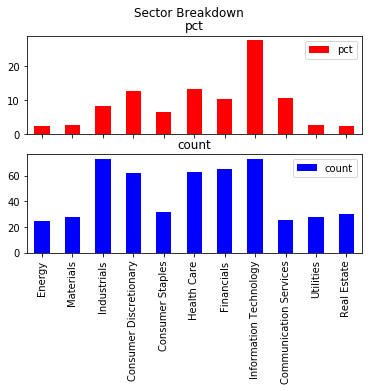

In [15]:
#--  How about a grouping application so we can do a little chart at the end

vcode = '''
JS getArrayFrom: 
    [ GlobalWorkspace Account findId: "Sp50" . holdings 
         groupedBy: [ mapEntry cp fs gicSector ] .
         extendBy: [ !weight <- groupList total: [ percentOfPort];
                     !count <- groupList count ;
                   ] 
    ]
   for: "name, weight, count"
'''

result =  vc.runvisionJSON(vcode)

groups = result['array']
labels = [x['name'] for x in groups]
weights = [x['weight'] for x in groups ] 
counts = [x['count'] for x in groups]


df = pd.DataFrame({'pct': weights, 'count' : counts}, index=labels)
myplot = df.plot.bar(rot=90, title= "Sector Breakdown", subplots=True, color=['red','blue'])
myplot


In [16]:
#-  Sample QA Report to find unexpected price changes
vcode = '''
JS getArrayFrom:
  [ GlobalWorkspace  SecurityMap factset masterList
       select: [ getPriceRecord isntDefault ] .
     extendBy: [ !cus <- cusip else: "" ;
                 !sed <- sedol else: "" ;
                 !pcurr <- getPriceRecord baseCurrency ;
                 !pdate <- getPriceRecord date ;
                 !lastPrice <- pdate evaluate: [ price ] ;
                 !prevPrice <- pdate - 1 businessDays evaluate: [ price ] ;
                 !pch <- (lastPrice / prevPrice - 1 ) * 100 ;
                 !diff <- lastPrice - prevPrice;
               ] .
     select: [ lastPrice > 1 ] .
     select: [ pch absoluteValue >= 30 && diff absoluteValue > 1] . first: 10 . 
   ] for: "cus, sed, pdate asInteger, pcurr code, lastPrice, prevPrice, pch, diff" .
'''

result = vc.runvisionJSON (vcode)
pd.DataFrame(result['array'], columns=['id','cus','sed','lastPrice','prevPrice','pcurr code', 'pch'])



,id,cus,sed,lastPrice,prevPrice,pcurr code,pch
0,05548G300,05548G300,,18.500,12.000000,USD,54.166667
1,078111200,078111200,,1820.010,1200.000000,USD,51.667500
2,15459P108,15459P108,,5.350,8.130000,USD,-34.194342
3,225426105,225426105,,3.645,2.300000,USD,58.478261
4,233347202,233347202,,3400.000,2200.000000,USD,54.545455
5,88343P402,88343P402,,4.700,7.490000,USD,-37.249666
6,655186302,655186302,,4.400,3.010000,USD,46.179402
7,279307201,279307201,,1101.250,702.150085,USD,56.839688
8,69366Q600,69366Q600,,5.020,0.650000,USD,672.307692
9,75903Q201,75903Q201,,15.560,10.000000,USD,55.600000


## Packaged Applications with the Applay Class

The **Applay** class has been created to support building structured applications in Vision that return JSON dictionary objects.   Applications are defined as methods that can read inputs from a supplied JSON dictionary object.

Some quick samples are shown below.  This [Jupyter Notebook](https://github.com/LeslieNewman/Vi-Py/blob/main/py/VisionStoryBoard.ipynb) describes a number of prepackaged applications.  This [Jupyter Notebook](https://github.com/LeslieNewman/Vi-Py/blob/main/py/VisionAdvancedStoryBoard.ipynb) describes how to create new applications.


In [17]:
#-- Run and application to return holdings for a supplied account as of a supplied date
params = {'acctId' : "OEX", 'date' : "20171231"}

#--  run the app
response = vc.runapp ("AccountHoldings", params)

#-- pull out the data 
data = response['response']
print ("Holdings For: ", data['id'], "  ", data['name'], " since ", data['date'])
pd.DataFrame(response['response']['constituents'], columns = ["acctId", "secId", "date", "name", "mval", "weight"]).head()


Holdings For:  OEX    S&P 100  since  20171231


,acctId,secId,date,name,mval,weight
0,78379010,00206R10,29-Dec-2017,AT&T Inc,2.387232e+11,1.655076
1,78379010,00282410,29-Dec-2017,Abbott Laboratories,9.933610e+10,0.688701
2,78379010,02000210,29-Dec-2017,Allstate Corp,3.757267e+10,0.260493
3,78379010,02209S10,29-Dec-2017,Altria Group Inc,1.362638e+11,0.944722
4,78379010,02313510,29-Dec-2017,Amazon.com Inc,4.677339e+11,3.242816


{'appName': 'AccountGroups', 'status': {'code': 0, 'message': 'Success'}, 'response': {'id': 'SP50', 'name': 'S&P 500', 'type': 'IndexAccount', 'date': 20201224, 'count': 505, 'groups': [{'groupId': '10', 'groupName': 'Energy', 'weight': 2.345269633099788, 'count': 25}, {'groupId': '15', 'groupName': 'Materials', 'weight': 2.6290494097324624, 'count': 28}, {'groupId': '20', 'groupName': 'Industrials', 'weight': 8.478797680225867, 'count': 73}, {'groupId': '25', 'groupName': 'Consumer Discretionary', 'weight': 12.680412971158074, 'count': 62}, {'groupId': '30', 'groupName': 'Consumer Staples', 'weight': 6.521234315755623, 'count': 32}, {'groupId': '35', 'groupName': 'Health Care', 'weight': 13.423136323553447, 'count': 63}, {'groupId': '40', 'groupName': 'Financials', 'weight': 10.423168459481708, 'count': 65}, {'groupId': '45', 'groupName': 'Information Technology', 'weight': 27.636211780779455, 'count': 73}, {'groupId': '50', 'groupName': 'Communication Services', 'weight': 10.7383058

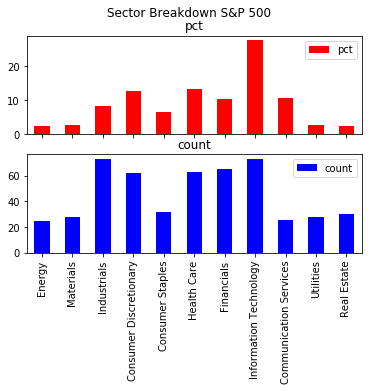

In [18]:
#-- Run application to return holdings grouped by sector and chart the result

result = vc.runapp("AccountGroups", {'acctId' : 'sp50', 'groupRule' : 'mapEntry cp fs gicSector'})
#result = vc.runapp("AccountGroups", {'acctId' : 'MS144845', 'groupRule' : 'mapEntry cp fs gicSector'})
print(result)

groups = result['response']['groups']
labels = [x['groupName'] for x in groups]
weights = [x['weight'] for x in groups ] 
counts = [x['count'] for x in groups]
title = "Sector Breakdown " + result['response']['name']

df = pd.DataFrame({'pct': weights, 'count' : counts}, index=labels)
myplot = df.plot.bar(rot=90, title= title, subplots=True, color=['red','blue'])